![](https://3.bp.blogspot.com/-bwI-Pr1rNVg/WHoSXAJN_XI/AAAAAAAAYrQ/Z3VV1nvjrqATUy6WtGqJ-DgIRe0UsiOTQCLcB/s1600/Gifs%2Banimados%2BDiamante%2B1.gif)

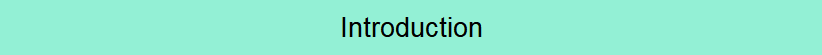

Diamonds... desired and expensive, diamonds are one of nature's most beautiful creations. It is the hardest mineral on the planet, no other mineral or substance can scratch it, on the other hand, it is very fragile, and it breaks easily.

Did you know that about 250 tons of gravel are needed to extract only one carat of diamond? And that 80% of the diamonds mined are used for industrial purposes?


Really cool facts, here in this notebook i am going to predict diamond prices using some regression algorithms, but before that, an exploratory data analysis will be done.

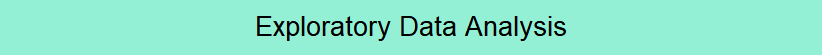

In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor


SEED = 42

In [2]:
# Loading data
df = pd.read_csv("diamonds.csv")
df.head(8)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53


* **carat** - Carat weight of the diamond.
* **cut** - Describes the cut quality of the diamond (from the best to worst: Ideal, Premium, Very Good, Good and Fair).
* **color** - Color of the diamond (from the best to worst: D, E, F, G, H, I and J).
* **clarity** - A measurement of how clear the diamond is (from the best to worst: IF, VVS1, VVS2, VS1, VS2, SI1, SI2 and I1).
* **depth** - The height of a diamond, measured from the culet to the table, divided by the average girdle diameter (%).
* **table** - The width of a diamond table expressed as a percentage of the average diameter (%).
* **x** - Diamond length (mm).
* **y** - Diamond width (mm).
* **z** - Diamond depth (mm).
* **price** - Diamond price.

In [3]:
# Getting some information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


# <font size="4">Missing Values</font>

As we can see from <code>df.info()</code>, there are no missing values.

In [4]:
if df.isnull().sum().any() == False:
    print("there are no missing values")
else:
    print("there are something wrong here")

there are no missing values


# <font size="4">Duplicate Rows</font>

Let's check for duplicate rows, but first we need to delete the "Unnamed: 0" column, since it is useless for us and has a diffent value for each row, in other words, if we do not drop this column, the number of duplicate lines will always be zero.

In [5]:
# Dropping "Unnamed: 0" column
df = df.drop(["Unnamed: 0"], axis = 1)

# Checking for duplicate rows
print("number of duplicate rows: ", df.duplicated().sum())

number of duplicate rows:  146


In [6]:
# Dropping them
df = df.drop_duplicates().reset_index(drop = True)

# <font size="4">Data Describe</font>

In [7]:
# Numerical data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53794.0,0.797780,0.473390,0.2,0.40,0.70,1.04,5.01
depth,53794.0,61.748080,1.429909,43.0,61.00,61.80,62.50,79.00
table,53794.0,57.458109,2.233679,43.0,56.00,57.00,59.00,95.00
price,53794.0,3933.065082,3988.114460,326.0,951.00,2401.00,5326.75,18823.00
x,53794.0,5.731214,1.120695,0.0,4.71,5.70,6.54,10.74
y,53794.0,5.734653,1.141209,0.0,4.72,5.71,6.54,58.90
z,53794.0,3.538714,0.705037,0.0,2.91,3.53,4.03,31.80


In [8]:
# Categorical data
df.describe(include = "O").T

,count,unique,top,freq
cut,53794,5,Ideal,21488
color,53794,7,G,11262
clarity,53794,8,SI1,13032


After use <code>df.describe().T</code>, we could see that the minimun value of **x**, **y** and **z** are equal to zero. Let's take a look at them.

In [9]:
format_dict = {"carat" : "{:.2f}", "depth" : "{:.1f}", "table" : "{:.1f}", "x" : "{:.2f}", "y" : "{:.2f}", "z" : "{:.2f}"}
df_zero = df.loc[(df["x"] == 0) | (df["y"] == 0) | (df["z"] == 0)]
df_zero.style.apply(lambda x: ["background: yellow" if n == 0 else "" for n in x], axis = 1).format(format_dict)

,carat,cut,color,clarity,depth,table,price,x,y,z
2201,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.00
2308,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.00
4778,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.00
5457,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.00
10145,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.00
11156,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.00
11935,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.00
13570,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.00
15914,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.00
24338,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.00


We know that this values must be greater than zero, but for some reason they are not. So let's treat them as missing values.

In [10]:
# Transforming them into NaN values
df.loc[df["x"] == 0, "x"] = np.nan 
df.loc[df["y"] == 0, "y"] = np.nan 
df.loc[df["z"] == 0, "z"] = np.nan 

# Seeing the number of the new missing values
df[["x", "y", "z"]].isnull().sum()

x     7
y     6
z    19
dtype: int64

Now, we have three columns with missing values. Let's see the strongest correlations for each one of them.

In [11]:
def get_corr(col):
    return df.corr().unstack()[col].sort_values(ascending = False)    

In [12]:
print("x correlations\n\n{0}\n\n{3}\n\ny correlations\n\n{1}\n\n{3}\n\nz correlations\n\n{2}".format(get_corr("x"), get_corr("y"), get_corr("z"), 25*"-"))

x correlations

x        1.000000
carat    0.977842
z        0.975382
y        0.974837
price    0.887133
table    0.195484
depth   -0.025304
dtype: float64

-------------------------

y correlations

y        1.000000
x        0.974837
z        0.956623
carat    0.953979
price    0.867691
table    0.183839
depth   -0.029335
dtype: float64

-------------------------

z correlations

z        1.000000
x        0.975382
carat    0.961030
y        0.956623
price    0.868030
table    0.151683
depth    0.094678
dtype: float64


* **x** strongest correlation is with **carat**
* **y** strongest correlation is with **x**
* **z** strongest correlation is with **x**

Since **carat** has no missing values and has a strong correlation with **x**, **y** and **z**, let's assume that the strongest correlation of all dimensions is with **carat**, because in some cases more than one dimension value is misising at the same row and we are going to use the median of this correlation to fill them.

In [13]:
def fill_nan_values(col):
    carat = df.groupby(["carat"])[col].median()
    index_list = list(df.loc[df[col].isnull() == True].sort_values(by = "carat", ascending = False).index)
    for i in index_list:
        carat_value = df.loc[i, "carat"]
        new_value = carat[carat_value]
        df.loc[i, col] = new_value
        print("carat: {0} / median {1} value: {2}".format(carat_value, col, new_value))
    return df.iloc[index_list].style.applymap(lambda x: "background-color: limegreen", subset = col).format(format_dict)

I put the values in descending order, so we can better visualize this correlation.

In [14]:
# Fixing "x" column
fill_nan_values("x")

carat: 2.25 / median x value: 8.47
carat: 1.56 / median x value: 7.46
carat: 1.2 / median x value: 6.78
carat: 1.14 / median x value: 6.71
carat: 1.07 / median x value: 6.57
carat: 1.0 / median x value: 6.38
carat: 0.71 / median x value: 5.72


,carat,cut,color,clarity,depth,table,price,x,y,z
27364,2.25,Premium,H,SI2,62.8,59.0,18034,8.47,nan,nan
24464,1.56,Ideal,G,VS2,62.2,54.0,12800,7.46,nan,nan
26183,1.20,Premium,D,VVS1,62.1,59.0,15686,6.78,nan,nan
15914,1.14,Fair,G,VS1,57.5,67.0,6381,6.71,nan,nan
11156,1.07,Ideal,F,SI2,61.6,56.0,4954,6.57,6.62,nan
11935,1.00,Very Good,H,VS2,63.3,53.0,5139,6.38,nan,nan
49413,0.71,Good,F,SI2,64.1,60.0,2130,5.72,nan,nan


In [15]:
# Fixing "y" column
fill_nan_values("y")

carat: 2.25 / median y value: 8.39
carat: 1.56 / median y value: 7.46
carat: 1.2 / median y value: 6.79
carat: 1.14 / median y value: 6.72
carat: 1.0 / median y value: 6.38
carat: 0.71 / median y value: 5.73


,carat,cut,color,clarity,depth,table,price,x,y,z
27364,2.25,Premium,H,SI2,62.8,59.0,18034,8.47,8.39,nan
24464,1.56,Ideal,G,VS2,62.2,54.0,12800,7.46,7.46,nan
26183,1.20,Premium,D,VVS1,62.1,59.0,15686,6.78,6.79,nan
15914,1.14,Fair,G,VS1,57.5,67.0,6381,6.71,6.72,nan
11935,1.00,Very Good,H,VS2,63.3,53.0,5139,6.38,6.38,nan
49413,0.71,Good,F,SI2,64.1,60.0,2130,5.72,5.73,nan


In [16]:
# Fixing "z" column
fill_nan_values("z")

carat: 2.8 / median z value: 5.5
carat: 2.25 / median z value: 5.19
carat: 2.25 / median z value: 5.19
carat: 2.2 / median z value: 5.17
carat: 2.18 / median z value: 5.16
carat: 2.02 / median z value: 5.0
carat: 1.56 / median z value: 4.59
carat: 1.5 / median z value: 4.53
carat: 1.2 / median z value: 4.21
carat: 1.15 / median z value: 4.16
carat: 1.14 / median z value: 4.14
carat: 1.12 / median z value: 4.11
carat: 1.1 / median z value: 4.09
carat: 1.07 / median z value: 4.05
carat: 1.01 / median z value: 3.98
carat: 1.01 / median z value: 3.98
carat: 1.0 / median z value: 3.96
carat: 1.0 / median z value: 3.96
carat: 0.71 / median z value: 3.54


,carat,cut,color,clarity,depth,table,price,x,y,z
27672,2.80,Good,G,SI2,63.8,58.0,18788,8.90,8.85,5.50
26063,2.25,Premium,I,SI1,61.3,58.0,15397,8.52,8.42,5.19
27364,2.25,Premium,H,SI2,62.8,59.0,18034,8.47,8.39,5.19
27047,2.20,Premium,H,SI1,61.2,59.0,17265,8.42,8.37,5.17
24338,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,5.16
27438,2.02,Premium,H,VS2,62.7,53.0,18207,8.02,7.95,5.00
24464,1.56,Ideal,G,VS2,62.2,54.0,12800,7.46,7.46,4.59
10145,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,4.53
26183,1.20,Premium,D,VVS1,62.1,59.0,15686,6.78,6.79,4.21
13570,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,4.16


# <font size="4">Outliers</font>

There are a lot of methods to find outlier values, but here we are going to use the simplest one: manually visualizing them. To this, we need to plot graphs showing the relation between all numerical features and the target (price).


In [17]:
def highlight_outliers(outliers, col):
    outliers_index = outliers.index
    i = pd.IndexSlice[outliers_index, col]
    return outliers.style.applymap(lambda x: "background-color: red", subset = i).format(format_dict)

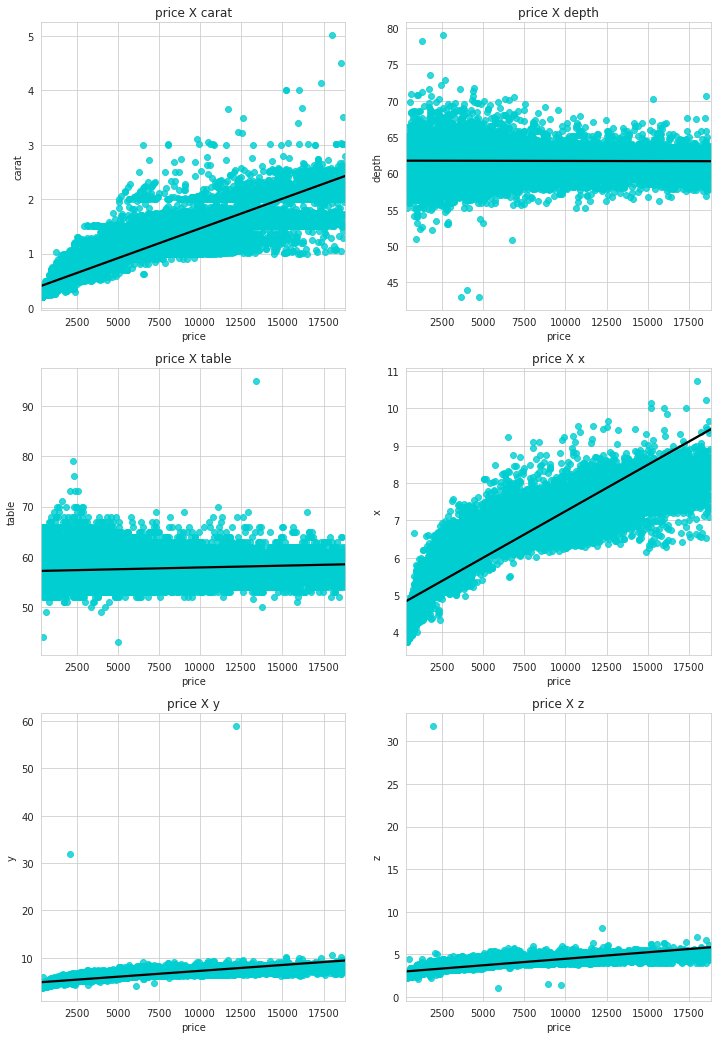

In [18]:
sns.set_style("whitegrid")
c = "darkturquoise"

plt.figure(figsize = (12, 18))
plt.subplot(3, 2, 1)
plt.title("price X carat")
sns.regplot(data = df, x = "price", y = "carat", color = c, line_kws = {"color" : "black"})
plt.subplot(3, 2, 2)
plt.title("price X depth")
sns.regplot(data = df, x = "price", y = "depth", color = c, line_kws = {"color" : "black"})
plt.subplot(3, 2, 3)
plt.title("price X table")
sns.regplot(data = df, x = "price", y = "table", color = c, line_kws = {"color" : "black"})
plt.subplot(3, 2, 4)
plt.title("price X x")
sns.regplot(data = df, x = "price", y = "x", color = c, line_kws = {"color" : "black"})
plt.subplot(3, 2, 5)
plt.title("price X y")
sns.regplot(data = df, x = "price", y = "y", color = c, line_kws = {"color" : "black"})
plt.subplot(3, 2, 6)
plt.title("price X z")
sns.regplot(data = df, x = "price", y = "z", color = c, line_kws = {"color" : "black"})
plt.show()

By looking at this graphs, we can see three values that are really far from others (notice the thickness difference between the last two graphs and the others). Let's take a look at them.

* <font size="3">price X y</font>

In [19]:
df_outliers = df.loc[df["y"] > 30].copy()
highlight_outliers(df_outliers, "y")

,carat,cut,color,clarity,depth,table,price,x,y,z
24012,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,58.90,8.06
49047,0.51,Ideal,E,VS1,61.8,55.0,2075,5.15,31.80,5.12


* <font size="3">price X z</font>

In [20]:
df_outliers = df.loc[df["z"] > 30].copy()
highlight_outliers(df_outliers, "z")

,carat,cut,color,clarity,depth,table,price,x,y,z
48268,0.51,Very Good,E,VS1,61.8,54.7,1970,5.12,5.15,31.80


This values are true outliers, let's treat them as missing values and do the same thing we did before.

In [21]:
# Transforming them into NaN values
df.loc[df["y"] > 30, "y"] = np.nan
df.loc[df["z"] > 30, "z"] = np.nan

In [22]:
# Fixing "y" column
fill_nan_values("y")

carat: 2.0 / median y value: 8.01
carat: 0.51 / median y value: 5.14


,carat,cut,color,clarity,depth,table,price,x,y,z
24012,2.00,Premium,H,SI2,58.9,57.0,12210,8.09,8.01,8.06
49047,0.51,Ideal,E,VS1,61.8,55.0,2075,5.15,5.14,5.12


In [23]:
# Fixing "z" column
fill_nan_values("z")

carat: 0.51 / median z value: 3.17


,carat,cut,color,clarity,depth,table,price,x,y,z
48268,0.51,Very Good,E,VS1,61.8,54.7,1970,5.12,5.15,3.17


Now that we are free of this true outliers, let's analyze the possible outliers.

* <font size="3">price X depth</font>

In [24]:
df_outliers = df.loc[(df["depth"] > 75) | (df["depth"] < 45)].copy()
highlight_outliers(df_outliers, "depth")

,carat,cut,color,clarity,depth,table,price,x,y,z
4506,1.00,Fair,G,SI1,43.0,59.0,3634,6.32,6.27,3.97
6325,1.00,Fair,G,VS2,44.0,53.0,4032,6.31,6.24,4.12
10353,1.09,Ideal,J,VS2,43.0,54.0,4778,6.53,6.55,4.12
41787,1.03,Fair,E,I1,78.2,54.0,1262,5.72,5.59,4.42
52715,0.50,Fair,E,VS2,79.0,73.0,2579,5.21,5.18,4.09


Well, even if this values are considerably distants from others they are not absurd values (e.g. 550%). Let's leave them as they are.

* <font size="3">price X table</font>

In [25]:
df_outliers = df.loc[(df["table"] > 90) | (df["depth"] < 45)].copy()
highlight_outliers(df_outliers, "table")

,carat,cut,color,clarity,depth,table,price,x,y,z
4506,1.00,Fair,G,SI1,43.0,59.0,3634,6.32,6.27,3.97
6325,1.00,Fair,G,VS2,44.0,53.0,4032,6.31,6.24,4.12
10353,1.09,Ideal,J,VS2,43.0,54.0,4778,6.53,6.55,4.12
24875,2.01,Fair,F,SI1,58.6,95.0,13387,8.32,8.31,4.87


Same thing as before.

* <font size="3">price X z</font>

In [26]:
df_outliers = df.loc[df["z"] < 2].copy()
highlight_outliers(df_outliers, "z")

,carat,cut,color,clarity,depth,table,price,x,y,z
14602,1.07,Ideal,F,SI1,60.6,57.0,5909,6.62,6.67,1.07
20651,1.53,Ideal,I,SI1,61.9,54.0,8971,7.43,7.50,1.53
21609,1.41,Ideal,H,VS1,60.7,56.0,9752,7.31,7.22,1.41


For some reason this **z** values are equal to the **carat**.

In [27]:
df.loc[df["carat"] == df["z"], ["carat", "z"]]

,carat,z
14602,1.07,1.07
20651,1.53,1.53
21609,1.41,1.41


This can not just be a coincidence, as only this three has this equal values (**carat** = **z**), so let's fix them, repeating the process.

In [28]:
# Transforming them into NaN values
df.loc[df["z"] < 2, "z"] = np.nan

In [29]:
fill_nan_values("z")

carat: 1.53 / median z value: 4.56
carat: 1.41 / median z value: 4.44
carat: 1.07 / median z value: 4.05


,carat,cut,color,clarity,depth,table,price,x,y,z
20651,1.53,Ideal,I,SI1,61.9,54.0,8971,7.43,7.50,4.56
21609,1.41,Ideal,H,VS1,60.7,56.0,9752,7.31,7.22,4.44
14602,1.07,Ideal,F,SI1,60.6,57.0,5909,6.62,6.67,4.05


# <font size="4">Data Visualization</font>

In [30]:
cut_palette = ["darkturquoise", "lightskyblue", "paleturquoise", "lightcyan", "azure"]
color_palette = ["cadetblue", "deepskyblue", "darkturquoise", "lightskyblue", "paleturquoise", "lightcyan", "azure"]
clarity_palette = ["cadetblue", "deepskyblue", "darkturquoise", "lightskyblue", "paleturquoise", "lightcyan", "azure", "ghostwhite"]

df["cut"] = pd.Categorical(df["cut"], categories = ["Ideal", "Premium", "Very Good", "Good", "Fair"], ordered = True)
df["color"] = pd.Categorical(df["color"], categories = ["D", "E", "F", "G", "H", "I", "J"], ordered = True)
df["clarity"] = pd.Categorical(df["clarity"], categories = ["IF", "VVS1", "VVS2", "VS1", "VS2", "SI1", "SI2", "I1"], ordered = True)

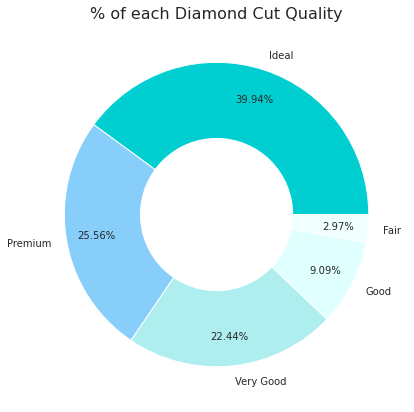

In [31]:
df_cut = df["cut"].value_counts()

plt.figure(figsize = (7,7))
plt.pie(data = df_cut, x = df_cut.values, labels = df_cut.index, autopct = "%.2f%%", pctdistance = 0.8, colors = cut_palette )
circle = plt.Circle(xy = (0, 0), radius = 0.5, facecolor = 'white')
plt.gca().add_artist(circle)
plt.title("% of each Diamond Cut Quality", size = 16)
plt.show()

Remembering the order: Ideal > Premium > Very Good > Good > Fair


In [32]:
position = 0
for cut in df_cut:
    print("{0} quality cuts: {1}".format(df_cut.index[position], df_cut.values[position]))
    position += 1

Ideal quality cuts: 21488
Premium quality cuts: 13748
Very Good quality cuts: 12069
Good quality cuts: 4891
Fair quality cuts: 1598


As we can see, there are a lot more high quality cut diamonds. Now let's see how this affects the price.

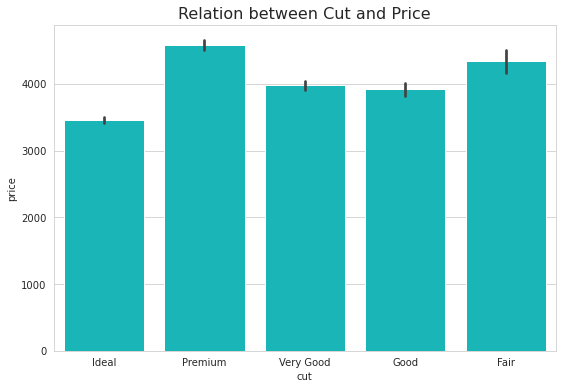

In [33]:
plt.figure(figsize = (9, 6))
sns.barplot(data = df, x = "cut", y = "price", color = c)
plt.title("Relation between Cut and Price", size = 16)
plt.show()

Well... this was unexpected, why the mean price of diamonds with ideal cuts are lower than all other diamonds with less quality cut?

Let's look which feature most impact on price.

In [34]:
get_corr("price")

price    1.000000
carat    0.921548
y        0.888703
x        0.887114
z        0.882251
table    0.126566
depth   -0.011048
dtype: float64

... and it is the carat.

So, if the carat is the most important thing, when we are looking for the price... Than, diamonds with ideal cuts, should have lower carat value.

In [35]:
df.groupby(["cut"])["carat"].mean()

cut
Ideal        0.703472
Premium      0.891620
Very Good    0.806195
Good         0.847215
Fair         1.043736
Name: carat, dtype: float64

Here it is, that is why the mean price of ideal cut diamonds is the lowest one.

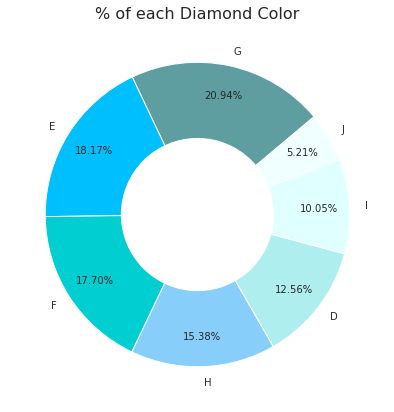

In [36]:
df_color = df["color"].value_counts()

plt.figure(figsize = (7,7))
plt.pie(data = df_color, x = df_color.values, labels = df_color.index, autopct = "%.2f%%", pctdistance = 0.8, startangle = 40, colors = color_palette)
circle = plt.Circle(xy = (0, 0), radius = 0.5, facecolor = 'white')
plt.gca().add_artist(circle)
plt.title("% of each Diamond Color", size = 16)
plt.show()

Remembering the order: D > E > F > G > H > I > J

In [37]:
position = 0
for color in df_color:
    print("{0} color diamonds: {1}".format(df_color.index[position], df_color.values[position]))
    position += 1

G color diamonds: 11262
E color diamonds: 9776
F color diamonds: 9520
H color diamonds: 8272
D color diamonds: 6755
I color diamonds: 5407
J color diamonds: 2802


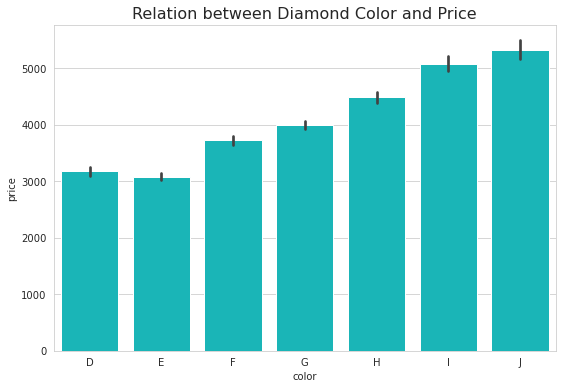

In [38]:
plt.figure(figsize = (9, 6))
sns.barplot(data = df, x = "color", y = "price", color = c)
plt.title("Relation between Diamond Color and Price", size = 16)
plt.show()

Again, the mean price of diamonds with better colors are lower than all other diamonds with worst colors.

In [39]:
df.groupby(["color"])["carat"].mean()

color
D    0.658315
E    0.657957
F    0.736664
G    0.771273
H    0.911029
I    1.025197
J    1.162841
Name: carat, dtype: float64

And the reason is the same as the cut.

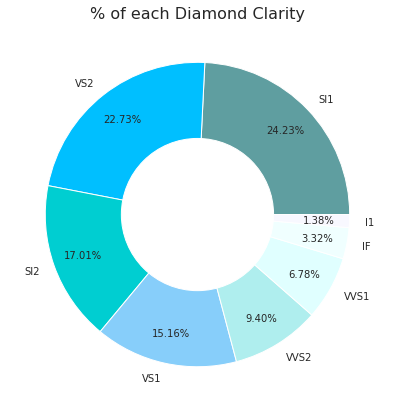

In [40]:
df_clarity = df["clarity"].value_counts()

plt.figure(figsize = (7,7))
plt.pie(data = df_clarity, x = df_clarity.values, labels = df_clarity.index, autopct = "%.2f%%", pctdistance = 0.8, colors = clarity_palette)
circle = plt.Circle(xy = (0, 0), radius = 0.5, facecolor = 'white')
plt.gca().add_artist(circle)
plt.title("% of each Diamond Clarity", size = 16)
plt.show()

Remembering the order: IF > VVS1 > VVS2 > VS1 > VS2 > SI1 > SI2 > I1

In [41]:
position = 0
for color in df_clarity:
    print("{0} clarity diamonds: {1}".format(df_clarity.index[position], df_clarity.values[position]))
    position += 1

SI1 clarity diamonds: 13032
VS2 clarity diamonds: 12229
SI2 clarity diamonds: 9150
VS1 clarity diamonds: 8156
VVS2 clarity diamonds: 5056
VVS1 clarity diamonds: 3647
IF clarity diamonds: 1784
I1 clarity diamonds: 740


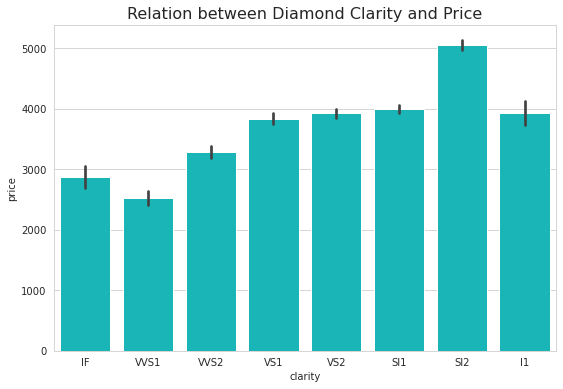

In [42]:
plt.figure(figsize = (9, 6))
sns.barplot(data = df, x = "clarity", y = "price", color = c)
plt.title("Relation between Diamond Clarity and Price", size = 16)
plt.show()

And again...

In [43]:
df.groupby(["clarity"])["carat"].mean()

clarity
IF      0.505645
VVS1    0.503696
VVS2    0.596527
VS1     0.727436
VS2     0.764276
SI1     0.850407
SI2     1.076402
I1      1.283527
Name: carat, dtype: float64

And the reason is the same.

# <font size="4">Data Preparation</font>

In [44]:
# Splitting the data into features and target
X = df.drop(["price"], axis = 1).copy()
y = df["price"].copy()

Some algorithms answers better with dummie variables, others with correctly ordered label encoder, so let's create two different ones.

In [45]:
# Dummy variables
X_dummies = X.copy()
X_dummies = pd.get_dummies(data = X_dummies, columns = ["clarity", "color", "cut"], prefix = ["clarity", "color", "cut"], drop_first = True).copy()

# Scaling the data
ss = StandardScaler()
X_dummies = ss.fit_transform(X_dummies)

# Label encoder
X_encoder = X.copy()
X_encoder["cut"] = X_encoder["cut"].replace({"Ideal": 1, "Premium": 2, "Very Good": 3, "Good": 4, "Fair": 5}).copy()
X_encoder["color"] = X_encoder["color"].replace({"D": 7, "E": 6, "F": 5, "G": 4, "H": 3, "I": 2, "J": 1}).copy()
X_encoder["clarity"] = X_encoder["clarity"].replace({"IF" : 8, "VVS1" : 7, "VVS2" : 6, "VS1" : 5, "VS2" : 4, "SI1" : 3, "SI2" : 2, "I1" : 1}).copy()

In [46]:
# K-folds for cross-validation
kf = KFold(n_splits = 10, random_state = SEED, shuffle = True)

# Evaluating the cross-validation
scoring = ["r2", "neg_mean_absolute_error", "neg_mean_squared_error"]

In [47]:
model_scores = {"train" : [],
                "test" : [],
                "mae" : [],
                "mse" : [],
                "rmse" : []}

def get_results(clf, features):
    scores = cross_validate(clf, features, y, cv = kf, scoring = scoring, return_train_score = True)
    train_score = scores["train_r2"].mean()
    model_scores["train"].append(train_score)
    test_score = scores["test_r2"].mean()
    model_scores["test"].append(test_score)
    mae = np.absolute(scores["test_neg_mean_absolute_error"]).mean()
    model_scores["mae"].append(mae)
    mse = np.absolute(scores["test_neg_mean_squared_error"]).mean()
    model_scores["mse"].append(mse)
    rmse = np.sqrt(mse)
    model_scores["rmse"].append(rmse)
    print("train score: {0:.4f}\nR2 score: {1:.4f}\nMAE: {2:.2f}\nMSE: {3:.2f}\nRMSE: {4:.2f}".format(train_score, test_score, mae, mse, rmse))

Note that all values are the mean of all cross-validation runs.

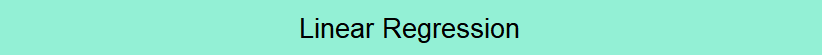

In [48]:
lr = LinearRegression()
get_results(lr, X_dummies)

train score: 0.9208
R2 score: 0.9206
MAE: 732.64
MSE: 1263206.91
RMSE: 1123.92


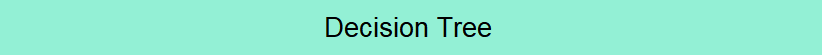

In [49]:
dtr = DecisionTreeRegressor(max_depth = 8, random_state = SEED)
get_results(dtr, X_encoder)

train score: 0.9722
R2 score: 0.9692
MAE: 388.15
MSE: 489904.63
RMSE: 699.93


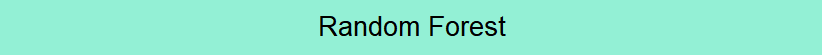

In [50]:
rfr = RandomForestRegressor(max_depth = 8, n_estimators = 40, random_state = SEED)
get_results(rfr, X_encoder)

train score: 0.9776
R2 score: 0.9752
MAE: 343.96
MSE: 395114.38
RMSE: 628.58


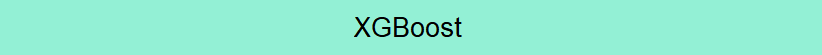

In [51]:
xgbr = XGBRegressor(learning_rate = 0.1, n_estimators = 200, random_state = SEED)
get_results(xgbr, X_encoder)

train score: 0.9897
R2 score: 0.9831
MAE: 266.08
MSE: 268514.71
RMSE: 518.18


In [52]:
print("train score\n")
print("Linear Regression: {0:.4f}\nDecision Tree: {1:.4f}\nRandom Forest: {2:.4f}\nXGBoost: {3:.4f}".format(model_scores["train"][0],model_scores["train"][1], model_scores["train"][2], model_scores["train"][3]))
print("\nR2 score\n")
print("Linear Regression: {0:.4f}\nDecision Tree: {1:.4f}\nRandom Forest: {2:.4f}\nXGBoost: {3:.4f}".format(model_scores["test"][0],model_scores["test"][1], model_scores["test"][2], model_scores["test"][3]))
print("\nMAE\n")
print("Linear Regression: {0:.2f}\nDecision Tree: {1:.2f}\nRandom Forest: {2:.2f}\nXGBoost: {3:.2f}".format(model_scores["mae"][0],model_scores["mae"][1], model_scores["mae"][2], model_scores["mae"][3]))
print("\nMSE\n")
print("Linear Regression: {0:.2f}\nDecision Tree: {1:.2f}\nRandom Forest: {2:.2f}\nXGBoost: {3:.2f}".format(model_scores["mse"][0],model_scores["mse"][1], model_scores["mse"][2], model_scores["mse"][3]))
print("\nRMSE\n")
print("Linear Regression: {0:.2f}\nDecision Tree: {1:.2f}\nRandom Forest: {2:.2f}\nXGBoost: {3:.2f}".format(model_scores["rmse"][0],model_scores["rmse"][1], model_scores["rmse"][2], model_scores["rmse"][3]))

train score

Linear Regression: 0.9208
Decision Tree: 0.9722
Random Forest: 0.9776
XGBoost: 0.9897

R2 score

Linear Regression: 0.9206
Decision Tree: 0.9692
Random Forest: 0.9752
XGBoost: 0.9831

MAE

Linear Regression: 732.64
Decision Tree: 388.15
Random Forest: 343.96
XGBoost: 266.08

MSE

Linear Regression: 1263206.91
Decision Tree: 489904.63
Random Forest: 395114.38
XGBoost: 268514.71

RMSE

Linear Regression: 1123.92
Decision Tree: 699.93
Random Forest: 628.58
XGBoost: 518.18


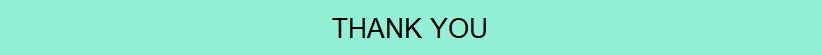